# HOMEWORK 1

Dataset available at https://www.kaggle.com/datasets/08163f86754da93458b7dfb3e1c80258069edd817a00db655f3ccc3da37c87b5?resource=download

Download Maths.csv dataset from this link and put it into notebook directory.

Our task here was to compare three machine learning model of different architecture in field of performance.

# Libraries and dependecies

We'll ignore all warings to make all results more readable. We set RANDOM_STATE to a constant value so the result could be easily reproduced. In the end we'll load the maths dataframe to out notebook and print it's first few rows.

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
maths = pd.read_csv('Maths.csv')
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Preprocessing 

We set "G3" as our target and we'll one-hot encode all categorical values using pandas `get_dummies` method. For splitting we've picked sklearn `train_test_split` method.

In [6]:
from sklearn.model_selection import train_test_split

CURRENT = "G3"
categorical_columns = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", 
                       "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
X = maths.copy()
X = pd.get_dummies(X, columns = categorical_columns)
y = X[CURRENT]
X = X.drop(CURRENT, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE)

# Model choice

Our models of choice are linear regression and two boosting algorithms. 

# XGBRegressor

This is first boosting model that uses many tree regression trees to produce a great regressor.

In [7]:
from xgboost import XGBRegressor

clf_xgb = XGBRegressor(random_state=RANDOM_STATE).fit(X_train, y_train)
xgb_test_score = clf_xgb.score(X_test, y_test)
xgb_train_score = clf_xgb.score(X_train, y_train)
name = type(clf_xgb).__name__
print(f"R2 score of {name} model:\nTrain set: {xgb_train_score}\nTest set: {xgb_test_score}")

R2 score of XGBRegressor model:
Train set: 0.9999999370197188
Test set: 0.7861305009552823


# AdaBoostRegressor

This model is yet another boosting algorithm that we've dropped here to compare it to the previous one (xgboost).

In [8]:
from sklearn.ensemble import AdaBoostRegressor

clf_ada = AdaBoostRegressor(random_state=RANDOM_STATE,n_estimators=100).fit(X_train, y_train)
ada_test_score = clf_ada.score(X_test, y_test)
ada_train_score = clf_ada.score(X_train, y_train)
name = type(clf_ada).__name__
print(f"R2 score of {name} model:\nTrain set: {ada_train_score}\nTest set: {ada_test_score}")

R2 score of AdaBoostRegressor model:
Train set: 0.9391633144457153
Test set: 0.7955245858594829


# LinearRegression

To compare prior ensembling models, here we've added linear regression model. Since values weren't scaled to 0,1 at start this model may struggle with predicting correct values.

In [9]:
from sklearn.linear_model import LinearRegression

clf_lin = LinearRegression().fit(X_train, y_train)
lin_test_score = clf_lin.score(X_test, y_test)
lin_train_score = clf_lin.score(X_train, y_train)
name = type(clf_lin).__name__
print(f"R2 score of {name} model:\nTrain set: {lin_train_score}\nTest set: {lin_test_score}")

R2 score of LinearRegression model:
Train set: 0.8655943170254856
Test set: 0.7241252220772819


# Measuring performance

Let's check our models performance using R2 score and MAE metric. Since predicted values could be any integer from 0 to 20 then MAE looks like a better choice of metric rather than MSE.

In [10]:
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error

prediction_lin = clf_lin.predict(X)
prediction_ada = clf_ada.predict(X)
prediction_xgb = clf_xgb.predict(X)

mae_lin = mean_absolute_error(y, prediction_lin)
mae_ada = mean_absolute_error(y, prediction_ada)
mae_xgb = mean_absolute_error(y, prediction_xgb)

names = list(map(lambda x: type(x).__name__, [clf_lin, clf_ada, clf_xgb]))
test_scores = [lin_test_score, ada_test_score, xgb_test_score]
train_scores = [lin_train_score, ada_train_score, xgb_train_score]  
maes = [mae_lin, mae_ada, mae_xgb]


<BarContainer object of 3 artists>

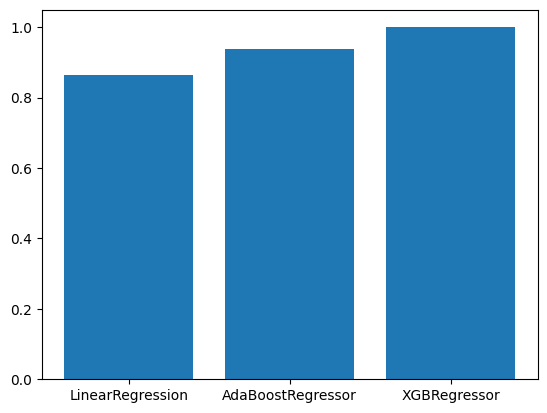

In [11]:
plt.bar(names, train_scores)

<BarContainer object of 3 artists>

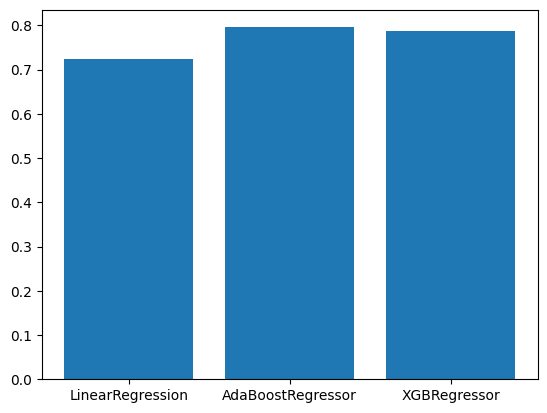

In [12]:
plt.bar(names, test_scores)

<BarContainer object of 3 artists>

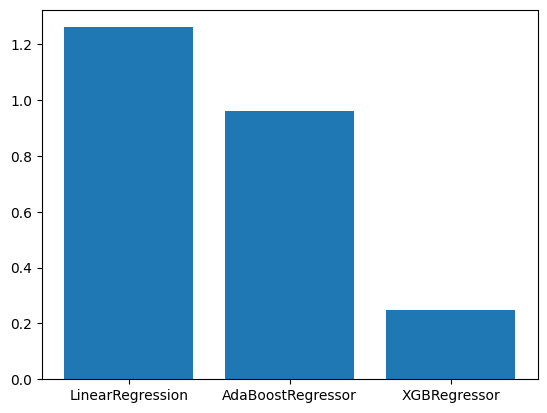

In [13]:
plt.bar(names, maes)


# Summary

After measuring our models R2 score one might wonder which model is the best. Ensembling models are obvious winners due to higher R2 score on both training and testing set in comparison to `LinearRegression`. Now to decide between XGBRegressor one might try to mark `AdaBoostRegressor` as the best model, but we can see a clear winner when we look at the MAE plot where `XGBRegressor` error is almost 5-times lower (!!!) than Ada model. 

By comparing these three models we've come to a conclusion where we mark the `XGBRegressor` as the superior model.
